In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id',axis=1,inplace=True)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#count the value
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

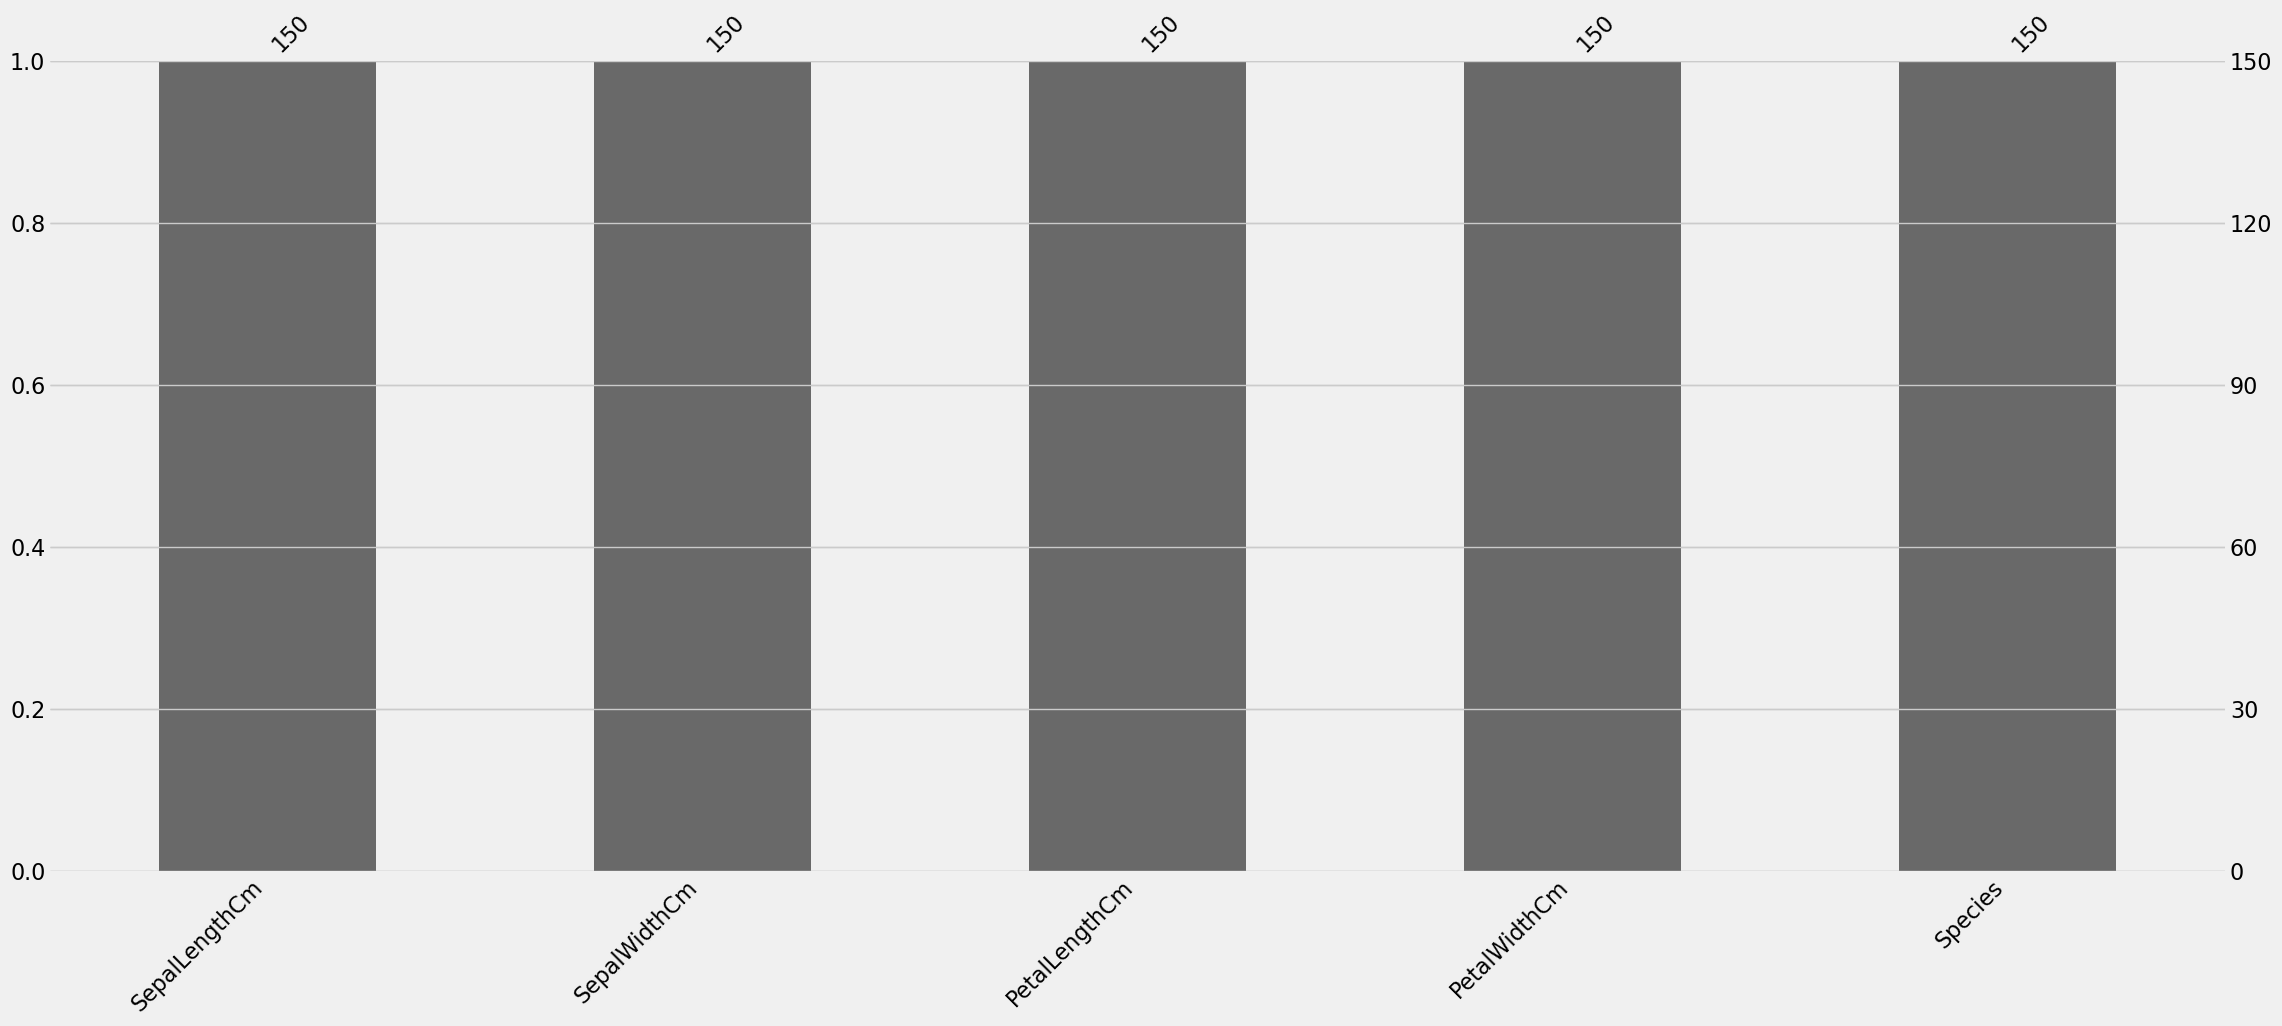

In [8]:
import missingno as msno
msno.bar(df)

In [9]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

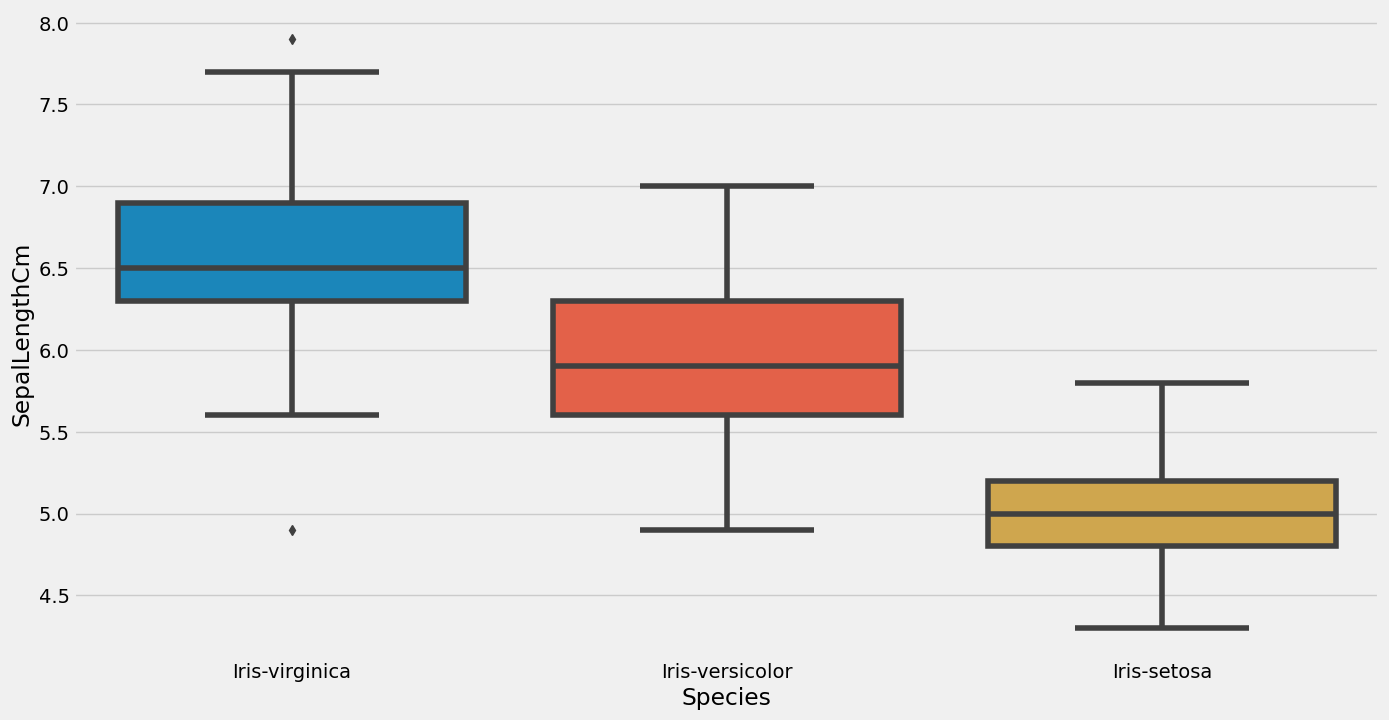

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

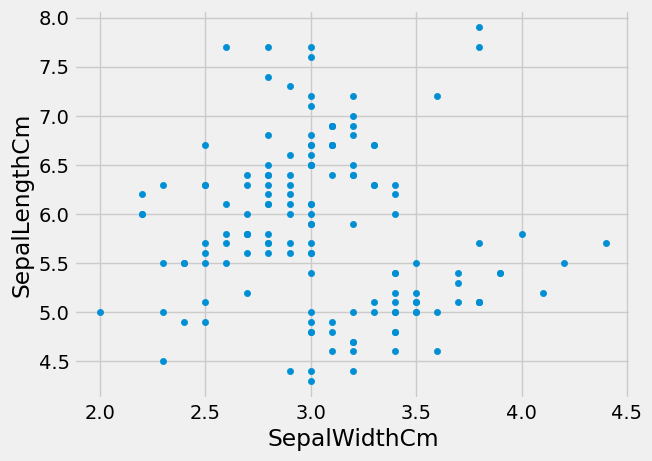

In [11]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

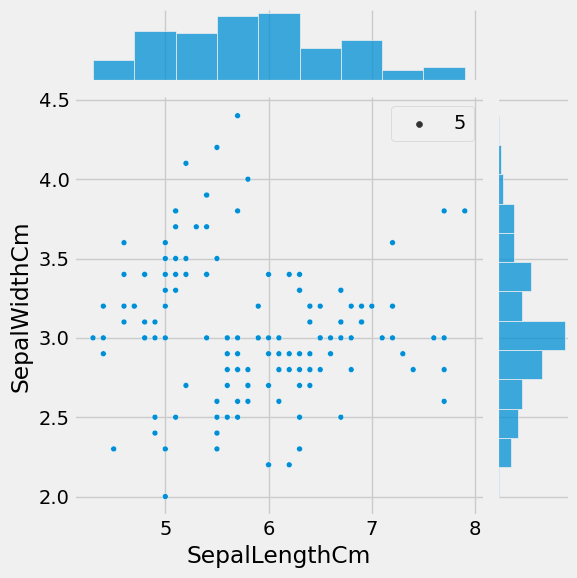

In [12]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

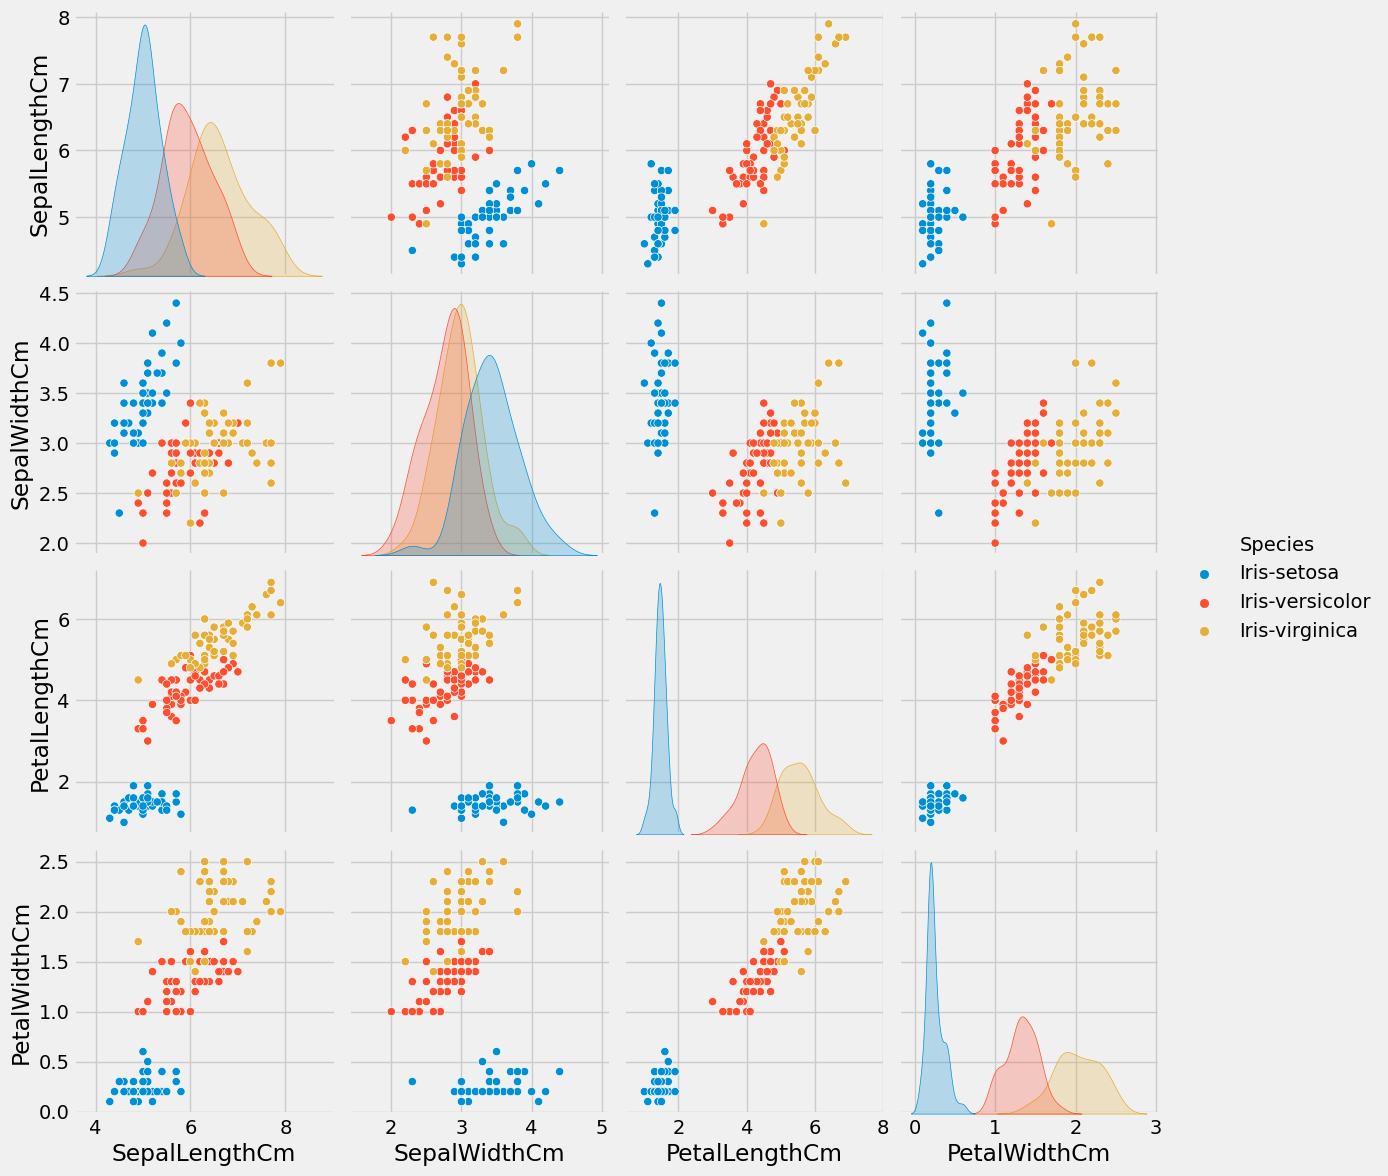

In [13]:
sns.pairplot(df, hue="Species", size=3)

<Axes: >

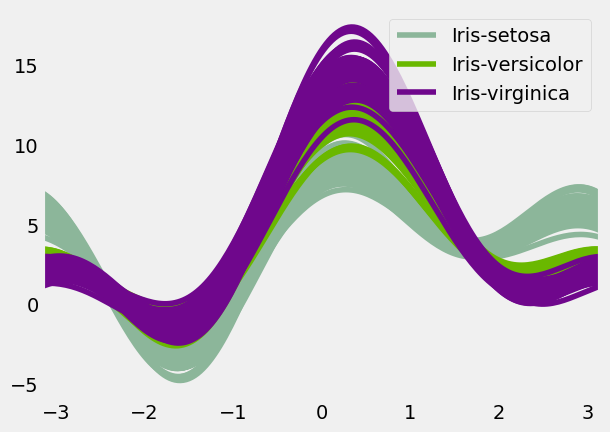

In [14]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

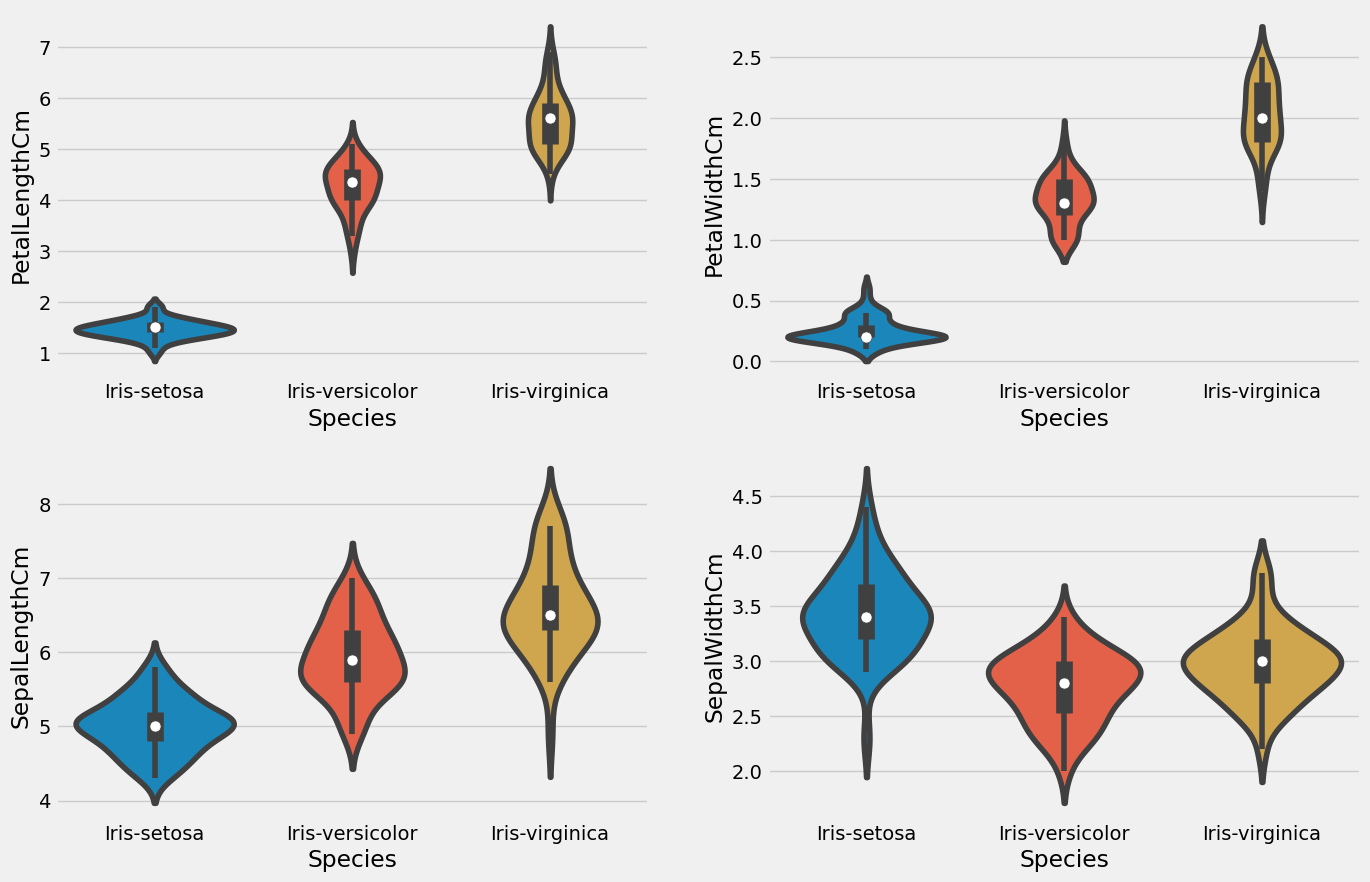

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [16]:
X=df.drop('Species',axis=1)
y=df['Species']
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))


Epoch 1/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step - accuracy: 0.0000e+00 - loss: 1.2913 - val_accuracy: 0.0222 - val_loss: 1.1456
Epoch 2/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0209 - loss: 1.1423 - val_accuracy: 0.3111 - val_loss: 1.0830
Epoch 3/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3529 - loss: 1.0525 - val_accuracy: 0.3333 - val_loss: 1.0680
Epoch 4/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3708 - loss: 1.0054 - val_accuracy: 0.3333 - val_loss: 1.0597
Epoch 5/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3083 - loss: 0.9894 - val_accuracy: 0.3333 - val_loss: 1.0285
Epoch 6/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3375 - loss: 0.9623 - val_accuracy: 0.3333 - val_loss: 0.9951
Epoch 7/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3354 - loss: 0.9219 - val_accuracy: 0.3333 - val_loss: 0.9521
Epoch 8/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3406 - loss: 0.8892 - val_accuracy: 0.3333 - val_loss: 0.